# Standard Libraries used

In [1]:
# standard libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# word processing libraries
from wordcloud import WordCloud
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
nltk.download('wordnet') 

nltk.download('stopwords')
stop_words = set(stopwords.words('english'))
new_word_list = ['flight', 'causing', 'encountered', 'difficult', 'proper', "n't", 'resulting', 'caused', 'making', 's', "'s", 'airline']
for word in new_word_list:
    stop_words.add(word)

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\melov\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\melov\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [2]:
df = pd.read_csv("Voice of Customer.csv").set_index('id')
print(f"length of dataset with NILs: {len(df)}")
df = df[df['voice of customer']!='NIL']
print(f"length of dataset w/o NILs: {len(df)}")
df

length of dataset with NILs: 14933
length of dataset w/o NILs: 2163


,satisfaction,satisfaction score,voice of customer
id,,,
72,neutral or dissatisfied,3,The emotional toll of the experience was overw...
93,neutral or dissatisfied,3,The extended wait for flight arrival was highl...
109,neutral or dissatisfied,4,The airline did not provide any updates during...
147,neutral or dissatisfied,4,The airline did not provide any compensation f...
244,neutral or dissatisfied,4,The airline charged excessive fees for baggage.
...,...,...,...
129647,neutral or dissatisfied,3,Faulty and unreliable onboard entertainment sy...
129709,neutral or dissatisfied,4,The cabin lacked proper disposal for used napk...
129721,neutral or dissatisfied,4,The airline lacked efficiency in managing flig...


In [3]:
# word preprocessing
lemmatizer = WordNetLemmatizer()

def text_clean(text):
    text = word_tokenize(text.lower())
    cleaned_text = [lemmatizer.lemmatize((word), pos='v') for word in text if not word in stop_words]
    return ' '.join(cleaned_text)

df['voice of customer modified'] = df['voice of customer'].str.replace(',','')
df['voice of customer modified'] = df['voice of customer modified'].str.replace('.','')
df['voice of customer modified'] = df['voice of customer modified'].str.replace('!','')
df['voice of customer modified'] = df['voice of customer modified'].apply(text_clean)

# WordCloud

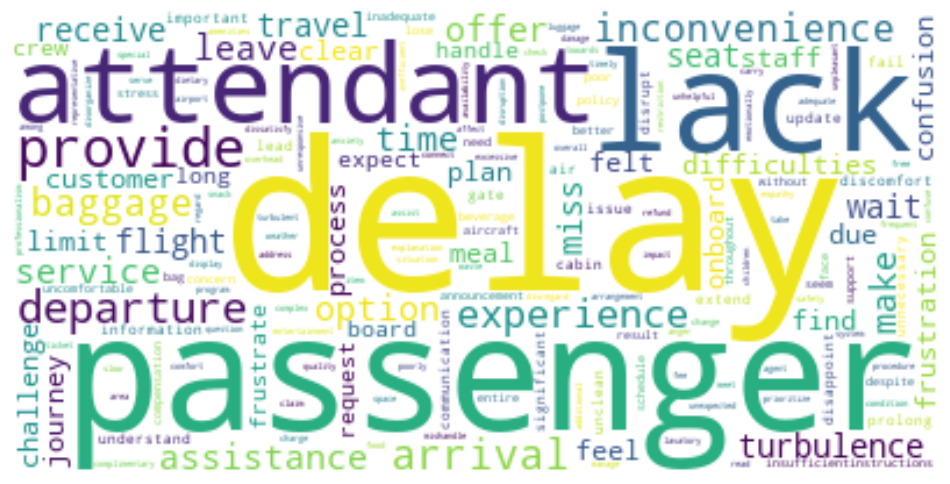

In [4]:
# plotting wordcloud

text = " ".join(df['voice of customer modified'])
word_cloud = WordCloud(collocations=False, background_color='white').generate(text)
plt.figure(figsize=(12,10))
plt.imshow(word_cloud, interpolation='bilinear')
plt.axis('off')
plt.show()

<Axes: xlabel='word'>

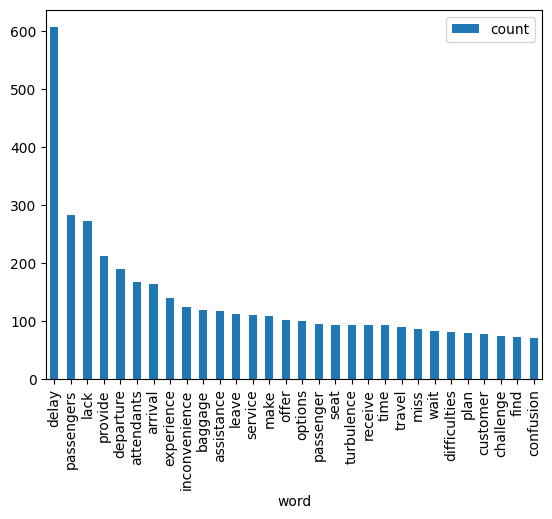

In [5]:
# plotting word frequency of top 30 words

word_dict = {}
for word in text.split():
    if word not in word_dict.keys():
        word_dict[word] = 1
    else:
        word_dict[word] += 1

word_df = pd.DataFrame({'word':word_dict.keys(), 'count': word_dict.values()})
top_words = word_df.sort_values('count', ascending=False).head(30)
top_words.plot.bar(x='word')

In [6]:
# - from word cloud and top 30 no. of words, we can see that certain topics could be delays, other passengers, 
# attendants and their service, could be possible topic groups

# - next we try to model different topics to better understand the different groups of complaints

# Topic Modeling

- [LDA topic modeling link](https://towardsdatascience.com/end-to-end-topic-modeling-in-python-latent-dirichlet-allocation-lda-35ce4ed6b3e0)
- [BertTopic topic modeling link](https://www.youtube.com/watch?v=v3SePt3fr9g&ab_channel=PythonTutorialsforDigitalHumanities)

Using LDA topic modeling

In [7]:
# importing topic modeling libraries
from gensim.models import LdaMulticore
import gensim.corpora as corpora

In [8]:
# create a list of the different sentences
sentence_list = []
for sentence in df['voice of customer modified'].values:
    sentence = sentence.split()
    sentence_list.append(sentence)
print('first sentence')
print(sentence_list[:1][0][:10])
# convert sentences to show term frequency within each sentence
id2word = corpora.Dictionary(sentence_list)
corpus = [id2word.doc2bow(sentence) for sentence in sentence_list]
print('first sentence term frequency')
print(corpus[:1][0][:10])

first sentence
['emotional', 'toll', 'experience', 'overwhelm', 'felt', 'fail', 'meet', 'expectations']
first sentence term frequency
[(0, 1), (1, 1), (2, 1), (3, 1), (4, 1), (5, 1), (6, 1), (7, 1)]


In [9]:
# lda model
from pprint import pprint
num_topics = range(3, 10)
for num in num_topics:
    print(f'num of topics set: {num}')
    lda_model = LdaMulticore(corpus= corpus, id2word = id2word, num_topics=num)
    pprint(lda_model.print_topics())
    print("----------------------------------------------------------------")

# as we see from below, all topics that were modeled with different number of clusters had high similarity with delay being
# within each topic cluster 


num of topics set: 3
[(0,
  '0.024*"delay" + 0.019*"lack" + 0.017*"passengers" + 0.012*"provide" + '
  '0.011*"leave" + 0.011*"seat" + 0.009*"cabin" + 0.009*"departure" + '
  '0.008*"wait" + 0.008*"service"'),
 (1,
  '0.066*"delay" + 0.021*"departure" + 0.018*"arrival" + 0.018*"lack" + '
  '0.014*"experience" + 0.013*"inconvenience" + 0.013*"passengers" + '
  '0.012*"plan" + 0.011*"provide" + 0.010*"options"'),
 (2,
  '0.025*"passengers" + 0.020*"attendants" + 0.017*"delay" + 0.017*"provide" + '
  '0.015*"lack" + 0.015*"baggage" + 0.013*"passenger" + 0.011*"assistance" + '
  '0.011*"miss" + 0.010*"make"')]
----------------------------------------------------------------
num of topics set: 4
[(0,
  '0.049*"delay" + 0.018*"arrival" + 0.018*"lack" + 0.015*"passengers" + '
  '0.013*"travel" + 0.012*"passenger" + 0.012*"departure" + 0.012*"provide" + '
  '0.012*"attendants" + 0.011*"inconvenience"'),
 (1,
  '0.040*"delay" + 0.022*"passengers" + 0.017*"departure" + 0.014*"lack" + '
  '0.014*

In [10]:
# importing libraries for analysis
import pyLDAvis.gensim
import pickle
import pyLDAvis
import os

In [11]:
# choosing number of topics to be 6 as it has the most unique cluster with no overlaps while not being too complex of a cluster
final_num_topics = 6
lda_model = LdaMulticore(corpus= corpus, id2word = id2word, num_topics=final_num_topics)

In [12]:
if not os.path.exists('topic_modeling'):
    os.makedirs('topic_modeling')

pyLDAvis.enable_notebook()
LDAvis_data_filepath = os.path.join('./topic_modeling/ldavis_prepared_'+str(final_num_topics))
# # this is a bit time consuming - make the if statement True
# # if you want to execute visualization prep yourself
if 1 == 1:
    LDAvis_prepared = pyLDAvis.gensim.prepare(lda_model, corpus, id2word)
    with open(LDAvis_data_filepath, 'wb') as f:
        pickle.dump(LDAvis_prepared, f)
# load the pre-prepared pyLDAvis data from disk
with open(LDAvis_data_filepath, 'rb') as f:
    LDAvis_prepared = pickle.load(f)
pyLDAvis.save_html(LDAvis_prepared, './topic_modeling/ldavis_prepared_'+ str(final_num_topics) +'.html')
LDAvis_prepared

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
3     -0.085151  0.019778       1        1  22.764455
1     -0.063315  0.039339       2        1  22.437452
2      0.041331  0.088617       3        1  17.325032
0     -0.052342 -0.089962       4        1  13.989180
4      0.071761 -0.054595       5        1  12.228861
5      0.087717 -0.003177       6        1  11.255019, topic_info=           Term        Freq       Total Category  logprob  loglift
13        delay  527.000000  527.000000  Default  30.0000  30.0000
8       arrival  145.000000  145.000000  Default  29.0000  29.0000
51   passengers  258.000000  258.000000  Default  28.0000  28.0000
259     options   94.000000   94.000000  Default  27.0000  27.0000
216        seat   89.000000   89.000000  Default  26.0000  26.0000
..          ...         ...         ...      ...      ...      ...
49       travel    9.547539   81.716069   Topic6  -5.1305   0.0374
2    experience    9.405282  121.657460   Topic6  -5.1455  -0.3756
151   passenger    8.480266   86.725321   Topic6  -5.2491  -0.1406
13        delay    9.513264  527.416827   Topic6  -5.1341  -1.8309
57         make    8.327271   97.276247   Topic6  -5.2673  -0.2737

[467 rows x 6 columns], token_table=      Topic      Freq     Term
term                          
390       1  0.086887        '
390       2  0.043443        '
390       3  0.608207        '
390       4  0.043443        '
390       5  0.086887        '
...     ...       ...      ...
200       2  0.094179  without
200       3  0.156966  without
200       5  0.125573  without
200       6  0.125573  without
974       5  0.515121    worry

[1038 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[4, 2, 3, 1, 5, 6])

Using BertTopic

In [13]:
from bertopic import BERTopic

c:\Users\melov\Documents\GitHub\dsacasecomp2023\venv\lib\site-packages\umap\distances.py:1063: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @numba.jit()
c:\Users\melov\Documents\GitHub\dsacasecomp2023\venv\lib\site-packages\umap\distances.py:1071: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @numba.jit()
c:\Users\melov\Documents\GitHub\dsacasecomp2023\venv\lib

In [14]:
# as bertopic is able to handle noise in data, we do not need to remove stopwords so we re-import the data to be used again
# isolating verbal complaint data to be processed
df_bert = pd.read_csv("Voice of Customer.csv")
bert_text = list(df_bert[df_bert['voice of customer']!='NIL']['voice of customer'])
bert_text[0]

'The emotional toll of the experience was overwhelming, and I felt the airline had failed to meet my expectations.'

In [15]:
# initialise model
topic_model = BERTopic(embedding_model='all-MiniLM-L6-v2', language='english')
topics, probs = topic_model.fit_transform(bert_text)

In [16]:
topic_model.get_topic_info().to_csv('topic_modeling/bertopic_topics.csv')
topic_model.get_topic_info()
# topic -1 are the outlier and noisy words

,Topic,Count,Name,Representation,Representative_Docs
0,-1,367,-1_delay_flight_for_the,"[delay, flight, for, the, arrival, did, proper...",[The airline did not provide proper assistance...
1,0,169,0_meal_options_food_any,"[meal, options, food, any, offer, dietary, bev...",[The airline didn't offer any gluten-free meal...
2,1,60,1_delays_question_lack_frustrated,"[delays, question, lack, frustrated, me, of, t...",[I felt frustrated and let down by the airline...
3,2,56,2_arrival_feeling_sadness_extended,"[arrival, feeling, sadness, extended, wait, de...",[The prolonged wait for flight arrival caused ...
4,3,51,3_turbulence_so_witnessed_intense,"[turbulence, so, witnessed, intense, other, th...",[The turbulence was so intense that it caused ...
...,...,...,...,...,...
62,61,11,61_lights_reading_read_overhead,"[lights, reading, read, overhead, work, diffic...","[There were limited overhead reading lights, m..."
63,62,11,62_adequate_disabilities_provide_mobility,"[adequate, disabilities, provide, mobility, as...",[The airline did not provide adequate support ...
64,63,11,63_claim_area_baggage_sufficient,"[claim, area, baggage, sufficient, lacked, bin...",[The baggage claim area lacked sufficient staf...
65,64,10,64_airport_hours_at_taxi,"[airport, hours, at, taxi, sit, just, spend, h...",[I had to wait at the airport for hours due to...


In [17]:
# representitive words in each topics
topic_model.get_topic(0)

[('meal', 0.05554134093894118),
 ('options', 0.05494519413173259),
 ('food', 0.039341792515722125),
 ('any', 0.038813442593674696),
 ('offer', 0.03603303037864269),
 ('dietary', 0.03469661479904822),
 ('beverage', 0.029129453577579283),
 ('served', 0.02659409672614029),
 ('vegetarian', 0.02659409672614029),
 ('quality', 0.024383014644150523)]

In [18]:
# representitive complaint for topic 0
topic_model.get_representative_docs(0)

["The airline didn't offer any gluten-free meal options, disregarding passengers with dietary restrictions.",
 'The airline did not provide any vegetarian meal options.',
 'The airline did not offer any vegetarian meal options.']

In [19]:
topic_df = pd.DataFrame({'topic': topics, 'voice of customer':bert_text}).merge(df_bert, on='voice of customer')
topic_df.to_csv('topic_modeling/bertopics_topic_results.csv')
topic_df

,topic,voice of customer,id,satisfaction,satisfaction score
0,7,The emotional toll of the experience was overw...,72,neutral or dissatisfied,3
1,-1,The extended wait for flight arrival was highl...,93,neutral or dissatisfied,3
2,18,The airline did not provide any updates during...,109,neutral or dissatisfied,4
3,26,The airline did not provide any compensation f...,147,neutral or dissatisfied,4
4,28,The airline charged excessive fees for baggage.,244,neutral or dissatisfied,4
...,...,...,...,...,...
2158,6,Faulty and unreliable onboard entertainment sy...,129647,neutral or dissatisfied,3
2159,-1,The cabin lacked proper disposal for used napk...,129709,neutral or dissatisfied,4
2160,-1,The airline lacked efficiency in managing flig...,129721,neutral or dissatisfied,4
2161,0,I encountered a delay in receiving my requeste...,129814,neutral or dissatisfied,4
